In [1]:
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns
from keras.applications.resnet import preprocess_input

In [2]:
train_dir='C:/Users/Djole/Desktop/ml/projekat_ml/slike/train'
test_dir='C:/Users/Djole/Desktop/ml/projekat_ml/slike/test'
klase=['angry','disgust','fear','happy','neutral','sad','surprise']

br_klasa=len(klase)
print(br_klasa)

7


In [3]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    horizontal_flip = True,
    vertical_flip= True,
    width_shift_range = [0.1,0.2],
    height_shift_range = [0.1,.2],
    validation_split=0.2
)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255
    preprocessing_function=preprocess_input,
)

In [4]:
train_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True,
    seed=50,
    subset="training"
    
)

validation_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode="rgb",
    class_mode="categorical",
    seed=50,
    subset="validation"
)

test_batch= test_generator.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
print(os.path.exists(train_dir))
print(os.path.exists(test_dir))

True
True


In [6]:
model=keras.Sequential()
bazni_model=keras.applications.ResNet50(weights='imagenet',
                                               include_top=False,
                                               input_shape=(224, 224, 3),
                                               )
bazni_model.trainable = False

model.add(bazni_model)
model.add(keras.layers.GlobalAveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation= 'relu'))
model.add(keras.layers.Dense(256,activation= 'relu'))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(.3))

model.add(keras.layers.Dense(br_klasa,activation='softmax'))

print(model.summary())

#optimizer=keras.optimizers.Adam(learning_rate = 0.01, momentum = 0.9, nesterov = True)
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.003),loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_batch,epochs=25,validation_data=validation_batch,verbose=1)

#cuvanje modela u keras formatu(novi format koji koristim umesto h5)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None
Epoch 1/25


C:\Users\Djole\miniconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 1021s 3s/step - accuracy: 0.2186 - loss: 1.9155 - val_accuracy: 0.3053 - val_loss: 1.7239
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 739s 2s/step - accuracy: 0.2850 - loss: 1.7637 - val_accuracy: 0.3506 - val_loss: 1.6545
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.3285 - loss: 1.6963 - val_accuracy: 0.3813 - val_loss: 1.6091
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - accuracy: 0.3534 - loss: 1.6532 - val_accuracy: 0.3754 - val_loss: 1.5783
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - accuracy: 0.3597 - loss: 1.6278 - val_accuracy: 0.4005 - val_loss: 1.5586
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 722s 2s/step - accuracy: 0.3786 - loss: 1.5975 - val_accuracy: 0.4018 - val_loss: 1.5395
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.3918 - loss: 1.5780 - val_accuracy: 0.3982 - val_loss: 1.5447
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.3974 - loss: 1.5650 - val_accuracy: 0.41

In [7]:
model.save('C:/Users/Djole/Desktop/ResNet50_zavrsni_model_gas.keras')

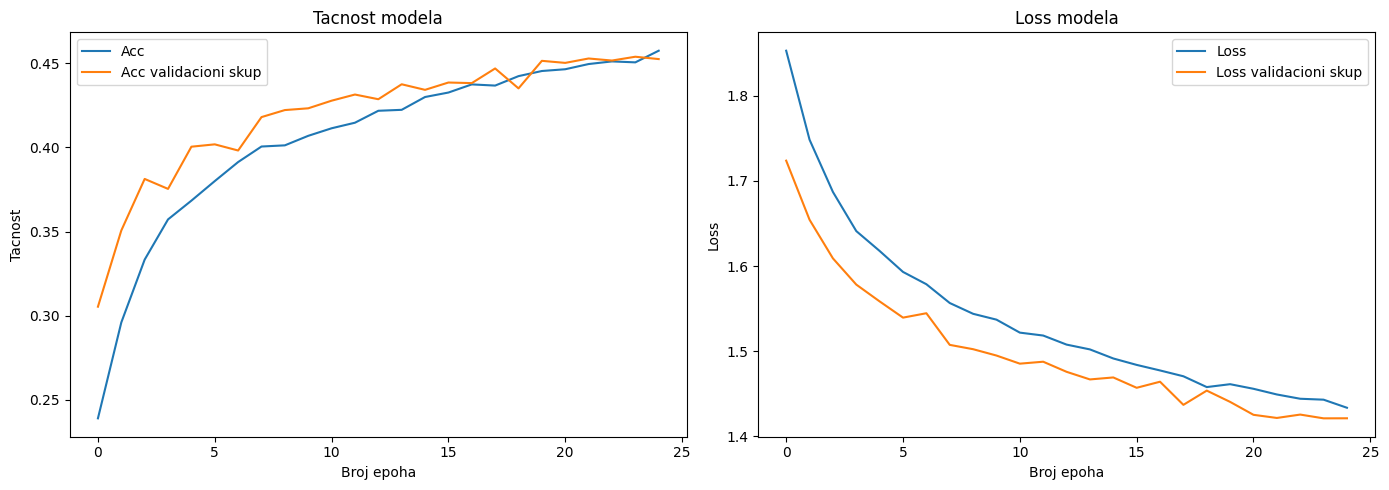

In [8]:
plt.figure(figsize=(14, 5))

#Acc
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acc')
plt.plot(history.history['val_accuracy'], label='Acc validacioni skup')
plt.xlabel('Broj epoha')
plt.ylabel('Tacnost')
plt.title('Tacnost modela')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Loss validacioni skup')
plt.xlabel('Broj epoha')
plt.ylabel('Loss')
plt.title('Loss modela')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
print("Pocetak")
def test():
    print("0")
    test_loss, test_acc = model.evaluate(test_batch, verbose=0)
    print("1")
    #predikcija modela
    y_pred_prob = model.predict(test_batch)
    y_pred = np.argmax(y_pred_prob, axis=1)

    y_true = test_batch.classes
    print("2")
    # rezultati testa MICRO
    accuracy_micro = metrics.accuracy_score(y_true, y_pred)
    precision_micro = metrics.precision_score(y_true, y_pred, average='micro')
    recall_micro = metrics.recall_score(y_true, y_pred, average='micro')
    f1_micro = metrics.f1_score(y_true, y_pred, average='micro')
    print("2")
    print('\n================MICRO====================\n')
    print(f'Accuracy MICRO: {accuracy_micro:.4f}')
    print(f'Precision MICRO: {precision_micro:.4f}')
    print(f'Recall MICRO: {recall_micro:.4f}')
    print(f'F1 Score MICRO: {f1_micro:.4f}')

    # rezultati testa weighted
    accuracy_weighted = metrics.accuracy_score(y_true, y_pred)
    precision_weighted = metrics.precision_score(y_true, y_pred, average='weighted')
    recall_weighted = metrics.recall_score(y_true, y_pred, average='weighted')
    f1_weighted = metrics.f1_score(y_true, y_pred, average='weighted')

    print('\n================weighted====================\n')
    print(f'Accuracy weighted: {accuracy_micro:.4f}')
    print(f'Precision weighted: {precision_micro:.4f}')
    print(f'Recall weighted: {recall_micro:.4f}')
    print(f'F1 Score weighted: {f1_micro:.4f}')

    accuracy_None = metrics.accuracy_score(y_true, y_pred)
    precision_None = metrics.precision_score(y_true, y_pred, average=None)
    recall_per_None = metrics.recall_score(y_true, y_pred, average=None)
    f1_per_None = metrics.f1_score(y_true, y_pred, average=None)

    print('\n================None====================\n')
    print(f'Accuracy None: {accuracy_micro:.4f}')
    print(f'Precision None: {precision_micro:.4f}')
    print(f'Recall None: {recall_micro:.4f}')
    print(f'F1 Score None: {f1_micro:.4f}')
    # matrica konfuzije
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=klase, yticklabels=klase)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
print("1")

Pocetak
1


0
1
113/113 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step
2
2

================MICRO====================

Accuracy MICRO: 0.1895
Precision MICRO: 0.1895
Recall MICRO: 0.1895
F1 Score MICRO: 0.1895

================weighted====================

Accuracy weighted: 0.1895
Precision weighted: 0.1895
Recall weighted: 0.1895
F1 Score weighted: 0.1895

================None====================

Accuracy None: 0.1895
Precision None: 0.1895
Recall None: 0.1895
F1 Score None: 0.1895


C:\Users\Djole\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Djole\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


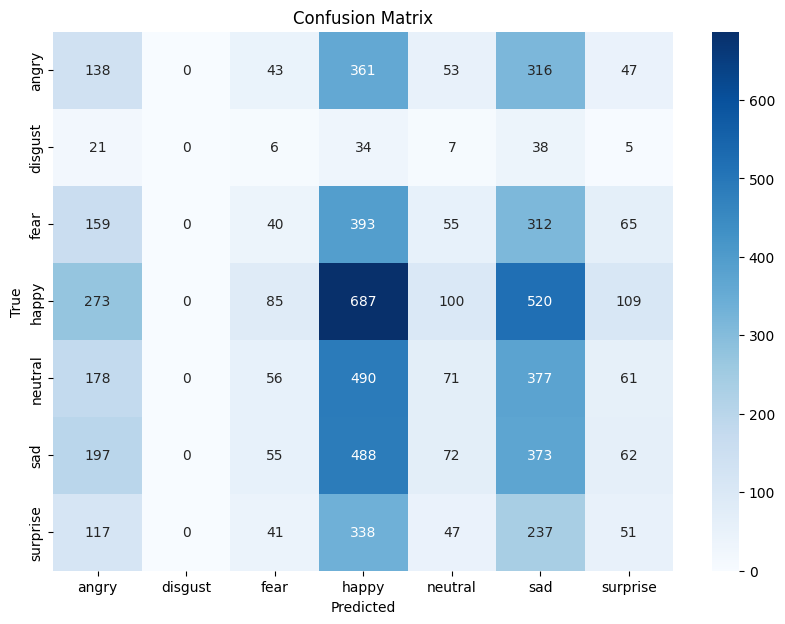

In [10]:
test()